In [222]:
import numpy as np
import matplotlib.pyplot as plt

In [325]:
a = 0
b = 1
A = 0
B = 0

def f(x, u):
  return x - u[0]



In [336]:
def F(f):
  return lambda x, u: np.append(u[1:], f(x, u))

def recount(func, a, b, u, h):
  func = F(f)

  x = a
  u = np.array(u)
  res = [(x, u[0])]
  
  while x + h <= b:
    u = u + h / 2 * (func(x, u) + func(x + h, u + h * func(x, u)))
    x = x + h
    res.append((x, u[0]))
  
  return res

In [345]:
eta = 4
recount((lambda x, u: x - u[0]), a, b, [A, eta], 0.1)

[(0, 0),
 (0.1, 0.4),
 (0.2, 0.797),
 (0.30000000000000004, 1.1880225),
 (0.4, 1.57014985),
 (0.5, 1.9405535009375),
 (0.6, 2.296522363119375),
 (0.7, 2.635489987832533),
 (0.7999999999999999, 2.9550602996082875),
 (0.8999999999999999, 3.2530316211382635),
 (0.9999999999999999, 3.5274187499493665)]

In [338]:
def err(actual, res):
  return actual - res[-1][1] 

err(B, recount(f, a, b, [A, eta], 0.01))



-1.3296075307941777

In [339]:
def new_param(eta_k, eta_k_prev, err_k, err_k_prev):
    return eta_k - (err_k * (eta_k - eta_k_prev)) / (err_k - err_k_prev)

In [349]:
def solve(f, a, b, A, B, eta0, eta1, h=0.1, eps=1e-5):
    
    result = [[eta0, err(B, recount(f, a, b, [A, eta0], h))],
              [eta1, err(B, recount(f, a, b, [A, eta1], h))]]
    
    _iter = 1
         
    while (np.abs(result[_iter][0] - result[_iter-1][0]) > eps):
        print(np.abs(result[_iter][0] - result[_iter-1][0]))
        current_eta = new_param(result[_iter][0], result[_iter - 1][0], result[_iter][1], result[_iter - 1][1])
        result.append([current_eta, err(B, recount(f, a, b, [A, current_eta], h))])
        _iter += 1
        
    return result
def solve_chord(f, a, b, A, B, eta_1, eta_2, h=0.1, eps=1e-5):
  eta = [eta_1, eta_2]
  hist = [recount(f, a, b, [A, eta_1], h), recount(f, a, b, [A, eta_2], h)]
  errors = [err(B, hist[0]), err(B, hist[1])]

  while abs(eta[-2] - eta[-1]) > eps:
    eta.append(eta[-1] - (eta[-1] - eta[-2]) * errors[-1] / (errors[-1] - errors[-2]))
    hist.append(recount(f, a, b, [A, eta[-1]], h))
    errors.append(err(B, hist[-1]))

  return hist[-1], hist



In [350]:
eta_1 = -1.3
eta_2 = (B - A) / (b - a)

print('eta_1 =', eta_1, '\terr =', err(B, recount(f, a, b, [A, eta_1], 0.1)))
print('eta_2 =', eta_2, '\terr =', err(B, recount(f, a, b, [A, eta_2], 0.1)))

eta_1 = -1.3 	err = 1.351830979266201
eta_2 = 0.0 	err = -0.17276993088733636


In [363]:
res, hist = solve_chord(f, a, b, A, B, eta_1, eta_2, h=0.01, eps=0.01)

In [381]:

arr = np.round(np.array(res), 3)
print(arr) 

[[ 0.     0.   ]
 [ 0.01  -0.001]
 [ 0.02  -0.003]
 [ 0.03  -0.004]
 [ 0.04  -0.006]
 [ 0.05  -0.007]
 [ 0.06  -0.009]
 [ 0.07  -0.01 ]
 [ 0.08  -0.012]
 [ 0.09  -0.013]
 [ 0.1   -0.014]
 [ 0.11  -0.016]
 [ 0.12  -0.017]
 [ 0.13  -0.019]
 [ 0.14  -0.02 ]
 [ 0.15  -0.021]
 [ 0.16  -0.023]
 [ 0.17  -0.024]
 [ 0.18  -0.026]
 [ 0.19  -0.027]
 [ 0.2   -0.028]
 [ 0.21  -0.029]
 [ 0.22  -0.031]
 [ 0.23  -0.032]
 [ 0.24  -0.033]
 [ 0.25  -0.034]
 [ 0.26  -0.036]
 [ 0.27  -0.037]
 [ 0.28  -0.038]
 [ 0.29  -0.039]
 [ 0.3   -0.04 ]
 [ 0.31  -0.041]
 [ 0.32  -0.042]
 [ 0.33  -0.043]
 [ 0.34  -0.044]
 [ 0.35  -0.045]
 [ 0.36  -0.046]
 [ 0.37  -0.047]
 [ 0.38  -0.048]
 [ 0.39  -0.049]
 [ 0.4   -0.049]
 [ 0.41  -0.05 ]
 [ 0.42  -0.051]
 [ 0.43  -0.052]
 [ 0.44  -0.052]
 [ 0.45  -0.053]
 [ 0.46  -0.053]
 [ 0.47  -0.054]
 [ 0.48  -0.054]
 [ 0.49  -0.055]
 [ 0.5   -0.055]
 [ 0.51  -0.056]
 [ 0.52  -0.056]
 [ 0.53  -0.056]
 [ 0.54  -0.056]
 [ 0.55  -0.057]
 [ 0.56  -0.057]
 [ 0.57  -0.057]
 [ 0.58  -0.05

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

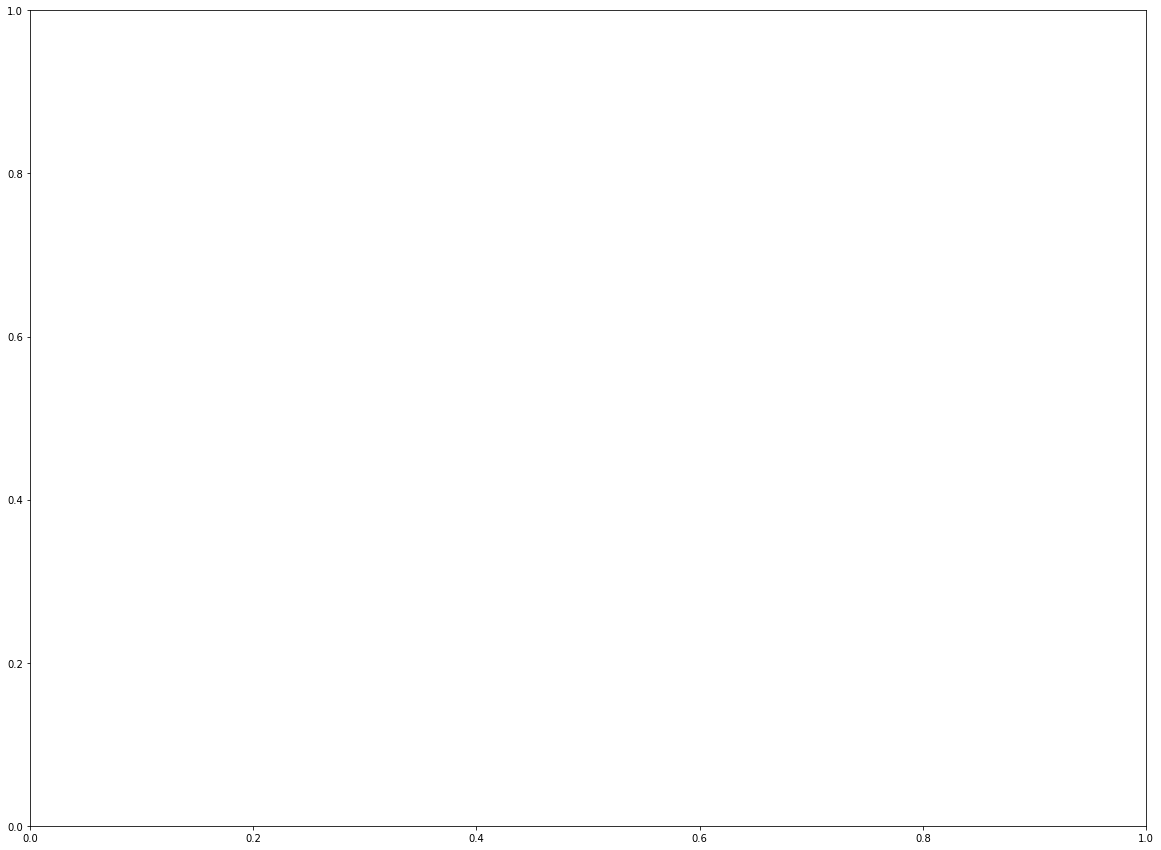

In [372]:
plt.rcParams["figure.figsize"] = (20, 15)

fig, ax = plt.subplots()

arr = np.array(res[1])
x = arr[:, 0]
y = arr[:, 1]
line = ax.plot(x, y, label='result', linewidth=3, color='black')

for eta, r in hist[:-1]:
  arr = np.array(r)
  x = arr[:, 0]
  y = arr[:, 1]
  line = ax.plot(x, y, label='eta = {:f}'.format(eta))

ax.legend()
plt.show()